#Red neuronal para la aproximación de funciones.


El teorema de aproximación universal para redes neuronales establece que cada función continua ($f(x)$) que mapea intervalos de números reales a algún intervalo de salida de números reales puede ser aproximado arbitrariamente por un perceptrón multicapa con una sola capa escondida, la cual proporciona la aproximación de la función $f(x)$ para cualquier x.

Como ejemplo usaremos a la función $f(x)=x^{3}$, que será la función a la que deseamos a proximar con la construcción de la red de una capa escondida  con cien neuronas, además se usará el algoritmo de backward propagation para actualizar los pesos nuevos y el error de cada iteración (época). Para la construcción de la red usaremos la paqueteria numpy.


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import torch

In [2]:
#Definimos la función que deseamos aproximar.
def approximate_function(a_0): 
    return math.pow(a_0,3)

#5 épocas.

In [ ]:

dtype = torch.float
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

def main():
    epochs=5                                                                    #Cantidad de veces que realizaremos el back propagation.
    s = 100
    lr = 0.01

    error_list = []
    epoch_list = []


    W_1, b_1, W_2, b_2 = parameter_initialize(s)                                  # Parametros de inicialización.

    for epoch in range(epochs):
        print("Esta es la  {} epoca".format(epoch + 1))
        epoch_list.append(epoch)
        p = torch.linspace(-3,3,100,dtype = dtype, device=device).reshape(100,1)  #Intervalo dónde deseamos aproximar a la función
        sum = 0
        for iter in range(p.shape[0]):

            a_0 = p[iter][0].reshape(1, 1)

            output, n_2, a_1, n_1 = forward(a_0, W_1, W_2, b_1, b_2)
            target = approximate_function(a_0)
            error = target - output
            square_error = (error.reshape(-1)[0]) * (error.reshape(-1)[0])
            sum += square_error

            s_1, s_2 = backward(error, a_1, W_2)
            W_2, W_1, b_2, b_1 = Update(W_1, W_2, b_1, b_2, lr, s_1, s_2, a_1, a_0)
        mean_square_error = sum/p.shape[0]                                         #El error en cada paso lo calculamos mediante el error cuadrático medio
        print("Error cuadrático medio:{}".format(mean_square_error))
        error_list.append(mean_square_error)

    #TODO: Plot
    y = []
    for x in p.reshape(-1):
        y.append(approximate_function(x))

    plot_error(lr, s, epoch_list, error_list)
    plot_function(p,y)
    plot_network(W_2, W_1, b_2, b_1, p, epochs)




def parameter_initialize(s):                                                      #Inicializamos los valores de W and b, valores iniciados aleatoriamente
    W_1 = torch.randn(s,1, dtype = dtype, device=device) - 0.5
    b_1 = torch.randn(s,1, dtype = dtype, device=device) - 0.5
    W_2 = torch.randn(1,s, dtype = dtype, device=device) - 0.5
    b_2 = torch.randn(1,1, dtype = dtype, device=device) - 0.5
    return W_1, b_1, W_2, b_2

def forward(a_0, W_1, W_2, b_1, b_2):                                             #Algoritmo de forward propagation

    n_1 = W_1.mm(a_0) + b_1
    a_1 = []

    for i in range(n_1.shape[0]):
          a_1.append(float(1)/(1+math.exp(-n_1[i])))

    a_1 = torch.tensor(a_1, device=device).float().reshape(-1,1)

    n_2 = W_2.mm(a_1) + b_2
    a_2 = n_2

    return a_2,n_2,a_1,n_1

def backward(error, a_1, W_2):                                                    #Algoritmo de backward propagation

     s_2 = -2*1*error

     # TODO:calcular F1 y transformar a matriz diagonal
     F_1 = []
     for i in range(a_1.shape[0]):
         F_1.append((1-a_1[i][0])*a_1[i][0])
     F_1 = torch.tensor(F_1, device=device).float().reshape(-1)
     F_1 = torch.diag(F_1)

     s_1 = F_1.mm(W_2.t())
     s_1 = s_1.mm(s_2)


     return s_1, s_2

def Update(W_1, W_2, b_1, b_2, lr, s_1, s_2, a_1, a_0 ):                          #Actualizamos los pesos y a b_{1,2}

    W_2_new = W_2 - lr*s_2.mm(a_1.t())

    b_2_new = b_2 - lr*s_2

    W_1_new = W_1 - lr*s_1.mm(a_0.t())

    b_1_new = b_1 - lr*s_1

    return W_2_new, W_1_new, b_2_new, b_1_new

#Gráfica del error vs época
def plot_error(lr,s,epoch,error):
    plt.figure()
    if lr==0.1:
        plt.plot(epoch, error, c='red', label=str(lr), alpha = 0.3)
    else:
        plt.plot(epoch, error, c='blue', label=str(lr), alpha = 0.3)

    plt.xlabel('Época.')
    plt.ylabel('Error cuadrado medio.')
    plt.grid(True)
    plt.legend(loc='best')
    plt.title('Error cuadrado medio. {} neuronas'.format(s))
    plt.show()

#Grafica de la función vs la aproximación
def plot_function(input,output):
    input = input.numpy()
    plt.plot(input,output, c='green', label=r'Función $f(x)$')
    plt.xlabel('x')
    plt.ylabel('f(x),aproximación.')
    plt.legend(loc='best')



def plot_network(W_2, W_1, b_2, b_1, input, epochs):
    output_list = []
    for x in input:
        x = x.reshape(1,1)
        output, n_2, a_1, n_1 = forward(x,W_1,W_2,b_1,b_2)
        output = output[0]
        output_list.append(output)
    input = input.numpy()
    plt.plot(input,output_list,c='orange',label='Network')
    plt.title('Función vs Network después de {} épocas'.format(epochs))
    plt.grid(True)
    plt.legend(loc='best')

    plt.show()




if __name__ == '__main__':
    main()

Esta es la  1 epoca
Error cuadrático medio:2.39888072013855
Esta es la  2 epoca
Error cuadrático medio:24.522626876831055
Esta es la  3 epoca
Error cuadrático medio:1.157017707824707
Esta es la  4 epoca
Error cuadrático medio:1.151326298713684
Esta es la  5 epoca
Error cuadrático medio:1.0056618452072144


#50 épocas.

Esta es la  1 epoca
Error cuadrático medio:1.7610348463058472
Esta es la  2 epoca
Error cuadrático medio:36.26692581176758
Esta es la  3 epoca
Error cuadrático medio:1.2954075336456299
Esta es la  4 epoca
Error cuadrático medio:1.1851974725723267
Esta es la  5 epoca
Error cuadrático medio:1.0701818466186523
Esta es la  6 epoca
Error cuadrático medio:1.55466628074646
Esta es la  7 epoca
Error cuadrático medio:2.587498426437378
Esta es la  8 epoca
Error cuadrático medio:3.896087408065796
Esta es la  9 epoca
Error cuadrático medio:5.153721809387207
Esta es la  10 epoca
Error cuadrático medio:6.187323093414307
Esta es la  11 epoca
Error cuadrático medio:6.936427593231201
Esta es la  12 epoca
Error cuadrático medio:7.379605293273926
Esta es la  13 epoca
Error cuadrático medio:7.5307297706604
Esta es la  14 epoca
Error cuadrático medio:7.430915355682373
Esta es la  15 epoca
Error cuadrático medio:7.127225875854492
Esta es la  16 epoca
Error cuadrático medio:6.651949405670166
Esta es la  17 e

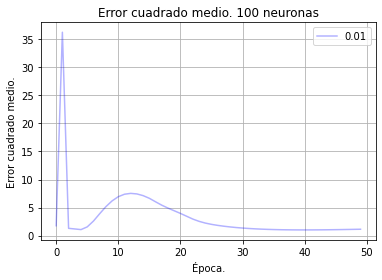

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


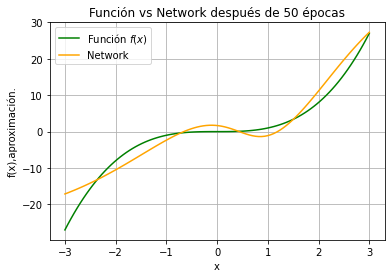

In [9]:

dtype = torch.float
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

def main():
    epochs=50                                                                    #Cantidad de veces que realizaremos el back propagation.
    s = 100
    lr = 0.01

    error_list = []
    epoch_list = []


    W_1, b_1, W_2, b_2 = parameter_initialize(s)                                  # Parametros de inicialización.

    for epoch in range(epochs):
        print("Esta es la  {} epoca".format(epoch + 1))
        epoch_list.append(epoch)
        p = torch.linspace(-3,3,100,dtype = dtype, device=device).reshape(100,1)  #Intervalo dónde deseamos aproximar a la función
        sum = 0
        for iter in range(p.shape[0]):

            a_0 = p[iter][0].reshape(1, 1)

            output, n_2, a_1, n_1 = forward(a_0, W_1, W_2, b_1, b_2)
            target = approximate_function(a_0)
            error = target - output
            square_error = (error.reshape(-1)[0]) * (error.reshape(-1)[0])
            sum += square_error

            s_1, s_2 = backward(error, a_1, W_2)
            W_2, W_1, b_2, b_1 = Update(W_1, W_2, b_1, b_2, lr, s_1, s_2, a_1, a_0)
        mean_square_error = sum/p.shape[0]                                         #El error en cada paso lo calculamos mediante el error cuadrático medio
        print("Error cuadrático medio:{}".format(mean_square_error))
        error_list.append(mean_square_error)

    #TODO: Plot
    y = []
    for x in p.reshape(-1):
        y.append(approximate_function(x))

    plot_error(lr, s, epoch_list, error_list)
    plot_function(p,y)
    plot_network(W_2, W_1, b_2, b_1, p, epochs)




def parameter_initialize(s):                                                      #Inicializamos los valores de W and b, valores iniciados aleatoriamente
    W_1 = torch.randn(s,1, dtype = dtype, device=device) - 0.5
    b_1 = torch.randn(s,1, dtype = dtype, device=device) - 0.5
    W_2 = torch.randn(1,s, dtype = dtype, device=device) - 0.5
    b_2 = torch.randn(1,1, dtype = dtype, device=device) - 0.5
    return W_1, b_1, W_2, b_2

def forward(a_0, W_1, W_2, b_1, b_2):                                             #Algoritmo de forward propagation

    n_1 = W_1.mm(a_0) + b_1
    a_1 = []

    for i in range(n_1.shape[0]):
          a_1.append(float(1)/(1+math.exp(-n_1[i])))

    a_1 = torch.tensor(a_1, device=device).float().reshape(-1,1)

    n_2 = W_2.mm(a_1) + b_2
    a_2 = n_2

    return a_2,n_2,a_1,n_1

def backward(error, a_1, W_2):                                                    #Algoritmo de backward propagation

     s_2 = -2*1*error

     # TODO:calcular F1 y transformar a matriz diagonal
     F_1 = []
     for i in range(a_1.shape[0]):
         F_1.append((1-a_1[i][0])*a_1[i][0])
     F_1 = torch.tensor(F_1, device=device).float().reshape(-1)
     F_1 = torch.diag(F_1)

     s_1 = F_1.mm(W_2.t())
     s_1 = s_1.mm(s_2)


     return s_1, s_2

def Update(W_1, W_2, b_1, b_2, lr, s_1, s_2, a_1, a_0 ):                          #Actualizamos los pesos y a b_{1,2}

    W_2_new = W_2 - lr*s_2.mm(a_1.t())

    b_2_new = b_2 - lr*s_2

    W_1_new = W_1 - lr*s_1.mm(a_0.t())

    b_1_new = b_1 - lr*s_1

    return W_2_new, W_1_new, b_2_new, b_1_new

#Gráfica del error vs época
def plot_error(lr,s,epoch,error):
    plt.figure()
    if lr==0.1:
        plt.plot(epoch, error, c='red', label=str(lr), alpha = 0.3)
    else:
        plt.plot(epoch, error, c='blue', label=str(lr), alpha = 0.3)

    plt.xlabel('Época.')
    plt.ylabel('Error cuadrado medio.')
    plt.grid(True)
    plt.legend(loc='best')
    plt.title('Error cuadrado medio. {} neuronas'.format(s))
    plt.show()

#Grafica de la función vs la aproximación
def plot_function(input,output):
    input = input.numpy()
    plt.plot(input,output, c='green', label=r'Función $f(x)$')
    plt.xlabel('x')
    plt.ylabel('f(x),aproximación.')
    plt.legend(loc='best')



def plot_network(W_2, W_1, b_2, b_1, input, epochs):
    output_list = []
    for x in input:
        x = x.reshape(1,1)
        output, n_2, a_1, n_1 = forward(x,W_1,W_2,b_1,b_2)
        output = output[0]
        output_list.append(output)
    input = input.numpy()
    plt.plot(input,output_list,c='orange',label='Network')
    plt.title('Función vs Network después de {} épocas'.format(epochs))
    plt.grid(True)
    plt.legend(loc='best')

    plt.show()




if __name__ == '__main__':
    main()

# 200 épocas

Esta es la  1 epoca
Error cuadrático medio:1.5708775520324707
Esta es la  2 epoca
Error cuadrático medio:15.28894329071045
Esta es la  3 epoca
Error cuadrático medio:1.3315188884735107
Esta es la  4 epoca
Error cuadrático medio:0.9321073293685913
Esta es la  5 epoca
Error cuadrático medio:1.6581757068634033
Esta es la  6 epoca
Error cuadrático medio:2.898984670639038
Esta es la  7 epoca
Error cuadrático medio:4.105757236480713
Esta es la  8 epoca
Error cuadrático medio:5.0750837326049805
Esta es la  9 epoca
Error cuadrático medio:5.859502792358398
Esta es la  10 epoca
Error cuadrático medio:6.427955150604248
Esta es la  11 epoca
Error cuadrático medio:6.6836838722229
Esta es la  12 epoca
Error cuadrático medio:6.669579029083252
Esta es la  13 epoca
Error cuadrático medio:6.453362941741943
Esta es la  14 epoca
Error cuadrático medio:6.095062732696533
Esta es la  15 epoca
Error cuadrático medio:5.665304183959961
Esta es la  16 epoca
Error cuadrático medio:5.213487148284912
Esta es la  17

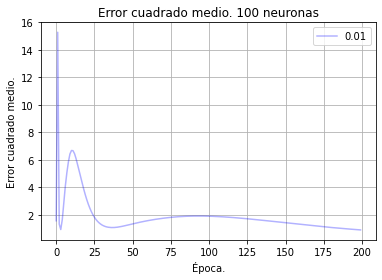

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


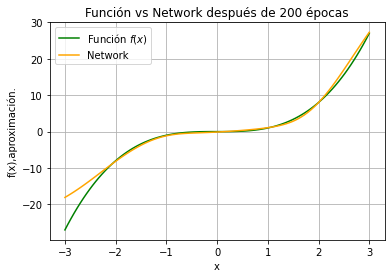

In [10]:

dtype = torch.float
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

def main():
    epochs=200                                                                   #Cantidad de veces que realizaremos el back propagation.
    s = 100
    lr = 0.01

    error_list = []
    epoch_list = []


    W_1, b_1, W_2, b_2 = parameter_initialize(s)                                  # Parametros de inicialización.

    for epoch in range(epochs):
        print("Esta es la  {} epoca".format(epoch + 1))
        epoch_list.append(epoch)
        p = torch.linspace(-3,3,100,dtype = dtype, device=device).reshape(100,1)  #Intervalo dónde deseamos aproximar a la función
        sum = 0
        for iter in range(p.shape[0]):

            a_0 = p[iter][0].reshape(1, 1)

            output, n_2, a_1, n_1 = forward(a_0, W_1, W_2, b_1, b_2)
            target = approximate_function(a_0)
            error = target - output
            square_error = (error.reshape(-1)[0]) * (error.reshape(-1)[0])
            sum += square_error

            s_1, s_2 = backward(error, a_1, W_2)
            W_2, W_1, b_2, b_1 = Update(W_1, W_2, b_1, b_2, lr, s_1, s_2, a_1, a_0)
        mean_square_error = sum/p.shape[0]                                         #El error en cada paso lo calculamos mediante el error cuadrático medio
        print("Error cuadrático medio:{}".format(mean_square_error))
        error_list.append(mean_square_error)

    #TODO: Plot
    y = []
    for x in p.reshape(-1):
        y.append(approximate_function(x))

    plot_error(lr, s, epoch_list, error_list)
    plot_function(p,y)
    plot_network(W_2, W_1, b_2, b_1, p, epochs)




def parameter_initialize(s):                                                      #Inicializamos los valores de W and b, valores iniciados aleatoriamente
    W_1 = torch.randn(s,1, dtype = dtype, device=device) - 0.5
    b_1 = torch.randn(s,1, dtype = dtype, device=device) - 0.5
    W_2 = torch.randn(1,s, dtype = dtype, device=device) - 0.5
    b_2 = torch.randn(1,1, dtype = dtype, device=device) - 0.5
    return W_1, b_1, W_2, b_2

def forward(a_0, W_1, W_2, b_1, b_2):                                             #Algoritmo de forward propagation

    n_1 = W_1.mm(a_0) + b_1
    a_1 = []

    for i in range(n_1.shape[0]):
          a_1.append(float(1)/(1+math.exp(-n_1[i])))

    a_1 = torch.tensor(a_1, device=device).float().reshape(-1,1)

    n_2 = W_2.mm(a_1) + b_2
    a_2 = n_2

    return a_2,n_2,a_1,n_1

def backward(error, a_1, W_2):                                                    #Algoritmo de backward propagation

     s_2 = -2*1*error

     # TODO:calcular F1 y transformar a matriz diagonal
     F_1 = []
     for i in range(a_1.shape[0]):
         F_1.append((1-a_1[i][0])*a_1[i][0])
     F_1 = torch.tensor(F_1, device=device).float().reshape(-1)
     F_1 = torch.diag(F_1)

     s_1 = F_1.mm(W_2.t())
     s_1 = s_1.mm(s_2)


     return s_1, s_2

def Update(W_1, W_2, b_1, b_2, lr, s_1, s_2, a_1, a_0 ):                          #Actualizamos los pesos y a b_{1,2}

    W_2_new = W_2 - lr*s_2.mm(a_1.t())

    b_2_new = b_2 - lr*s_2

    W_1_new = W_1 - lr*s_1.mm(a_0.t())

    b_1_new = b_1 - lr*s_1

    return W_2_new, W_1_new, b_2_new, b_1_new

#Gráfica del error vs época
def plot_error(lr,s,epoch,error):
    plt.figure()
    if lr==0.1:
        plt.plot(epoch, error, c='red', label=str(lr), alpha = 0.3)
    else:
        plt.plot(epoch, error, c='blue', label=str(lr), alpha = 0.3)

    plt.xlabel('Época.')
    plt.ylabel('Error cuadrado medio.')
    plt.grid(True)
    plt.legend(loc='best')
    plt.title('Error cuadrado medio. {} neuronas'.format(s))
    plt.show()

#Grafica de la función vs la aproximación
def plot_function(input,output):
    input = input.numpy()
    plt.plot(input,output, c='green', label=r'Función $f(x)$')
    plt.xlabel('x')
    plt.ylabel('f(x),aproximación.')
    plt.legend(loc='best')



def plot_network(W_2, W_1, b_2, b_1, input, epochs):
    output_list = []
    for x in input:
        x = x.reshape(1,1)
        output, n_2, a_1, n_1 = forward(x,W_1,W_2,b_1,b_2)
        output = output[0]
        output_list.append(output)
    input = input.numpy()
    plt.plot(input,output_list,c='orange',label='Network')
    plt.title('Función vs Network después de {} épocas'.format(epochs))
    plt.grid(True)
    plt.legend(loc='best')

    plt.show()




if __name__ == '__main__':
    main()